In [101]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [102]:
def load_img():

    blank_img = np.zeros((600, 600))

    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,
                text="ABCDE",
                org=(50, 300),
                fontFace=font,
                fontScale=5,
                color=(255, 255, 255),
                thickness=25
                )

    return blank_img

In [103]:
def display_img(img):
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap="gray")

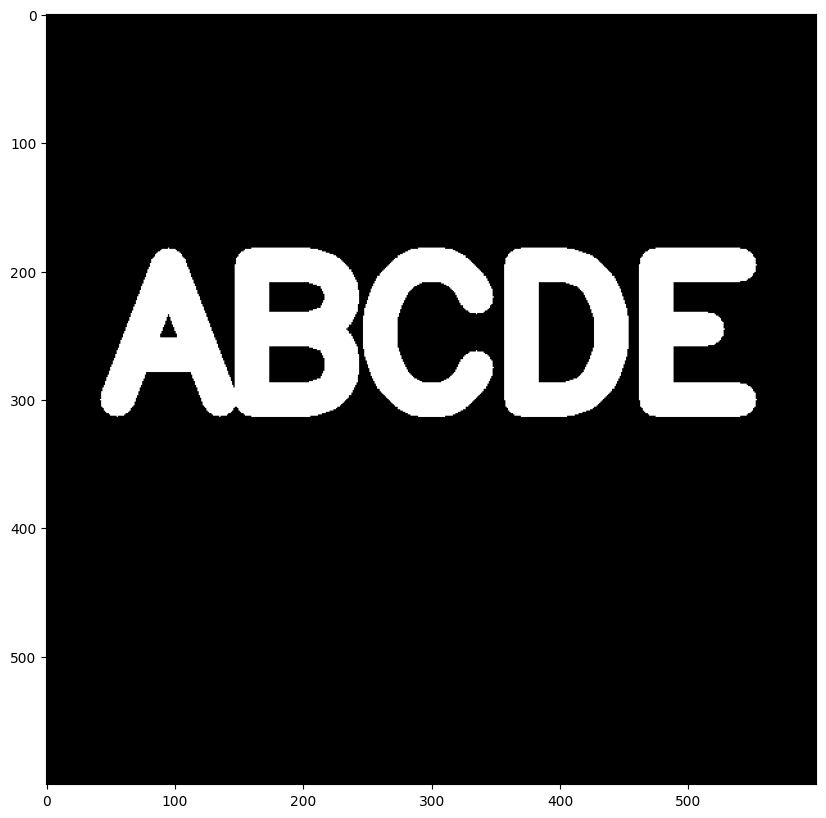

In [104]:
img = load_img()
display_img(img)

## Erosion

In [105]:
kernel = np.ones((5, 5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

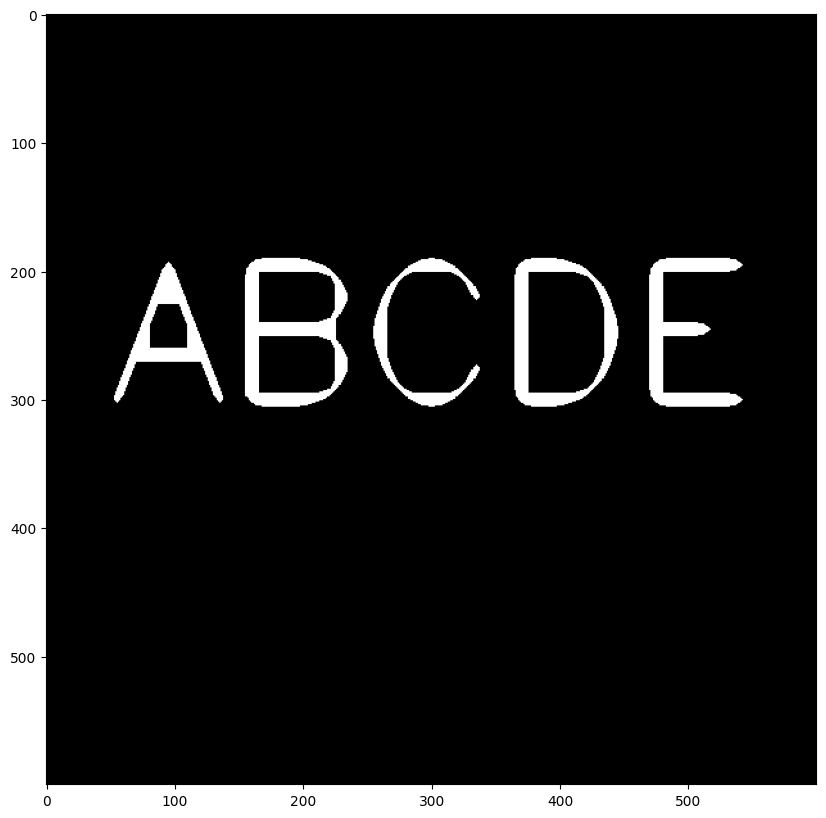

In [106]:
result = cv2.erode(img, kernel, iterations=4)

display_img(result)

## Creating a noise image

In [107]:
img = load_img()

In [108]:
white_noise = np.random.randint(low=0, high=2, size=(600, 600))
white_noise

array([[1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 1, 0]])

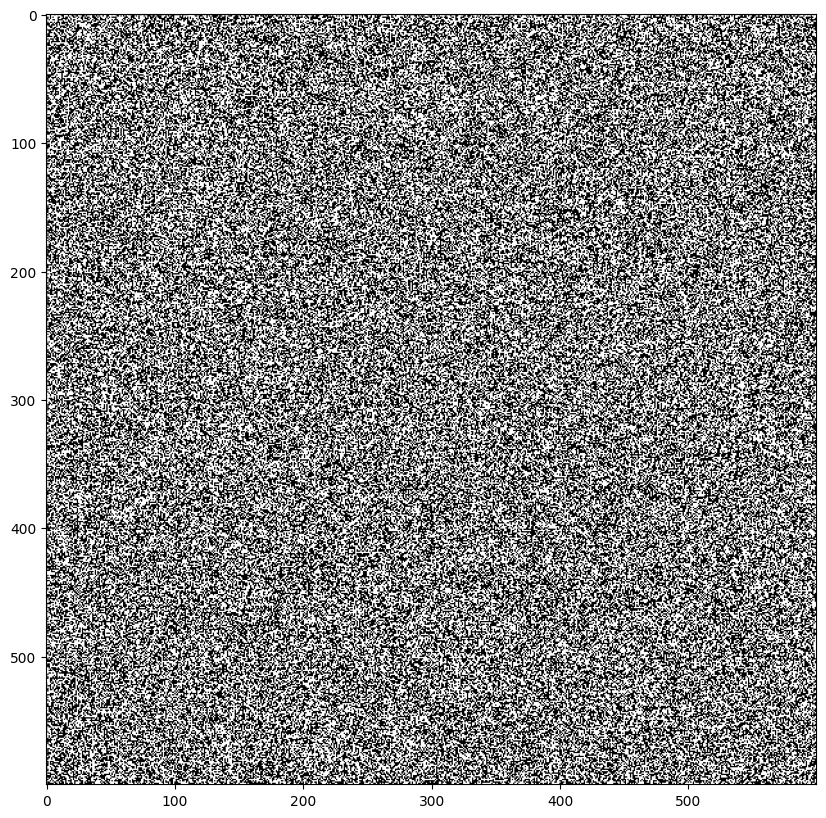

In [109]:
display_img(white_noise)

In [110]:
white_noise = white_noise * 255
white_noise

array([[255, 255, 255, ..., 255,   0, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255,   0, 255, ...,   0, 255, 255],
       ...,
       [  0, 255, 255, ..., 255,   0, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ..., 255, 255,   0]])

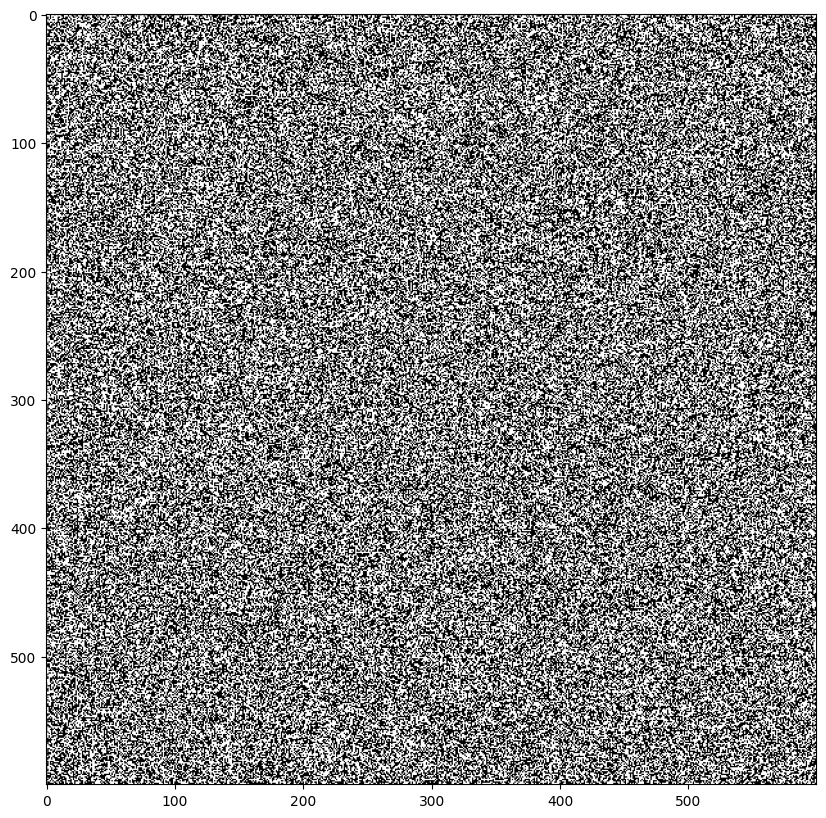

In [111]:
display_img(white_noise)

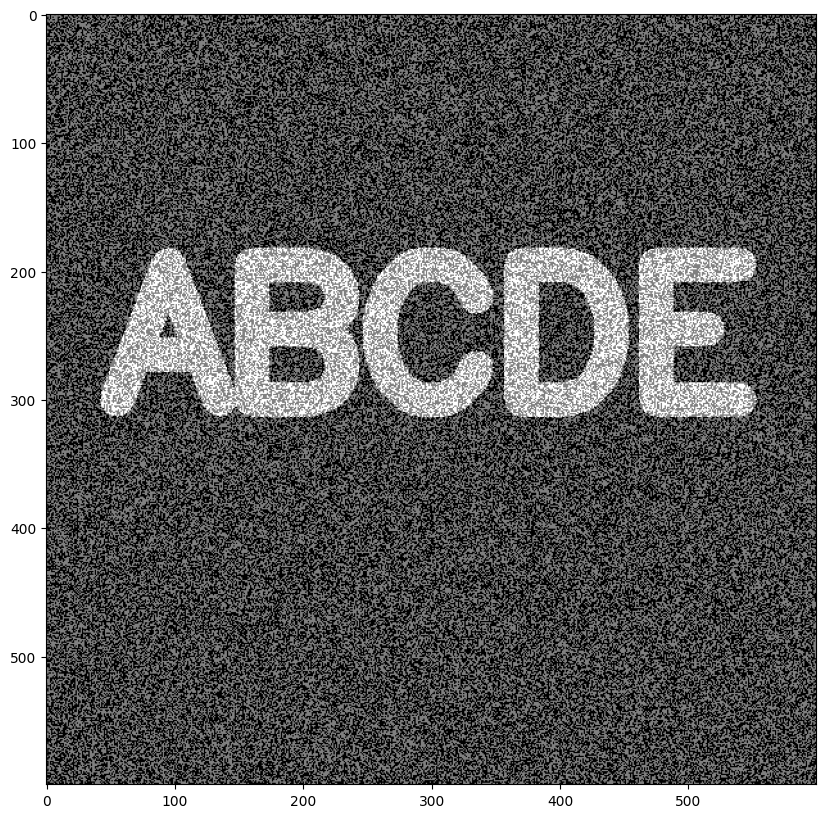

In [112]:
noise_img = white_noise + img

display_img(noise_img)

## Denoising the image

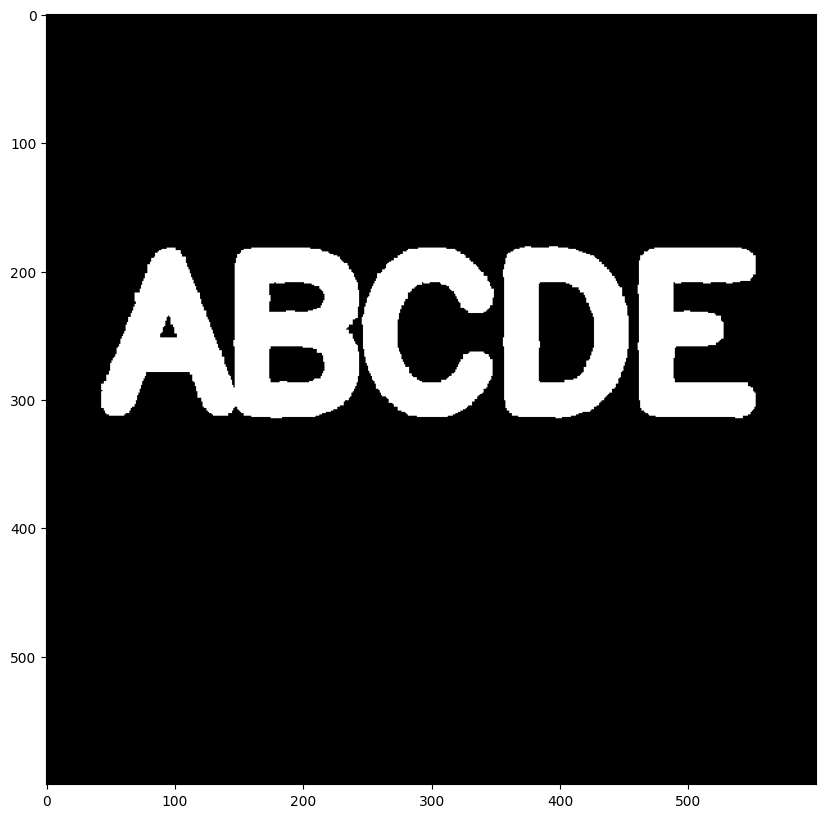

In [113]:
kernel = np.ones((5, 5), dtype=np.uint8)

opening = cv2.morphologyEx(noise_img,
                           op=cv2.MORPH_OPEN, # Morphological operation
                           kernel=kernel
                           ) # Opening is eorosion followed by dilation

display_img(opening)

## Denoising Background

In [114]:
img = load_img()

In [115]:
black_noise = np.random.randint(low=0, high=2, size=(600, 600))

In [116]:
black_noise

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0]])

In [117]:
black_noise = black_noise * -255

In [118]:
black_noise

array([[   0,    0,    0, ...,    0, -255,    0],
       [   0,    0, -255, ...,    0,    0,    0],
       [   0,    0,    0, ..., -255, -255, -255],
       ...,
       [   0, -255,    0, ..., -255,    0,    0],
       [-255,    0,    0, ...,    0, -255,    0],
       [   0, -255, -255, ...,    0, -255,    0]])

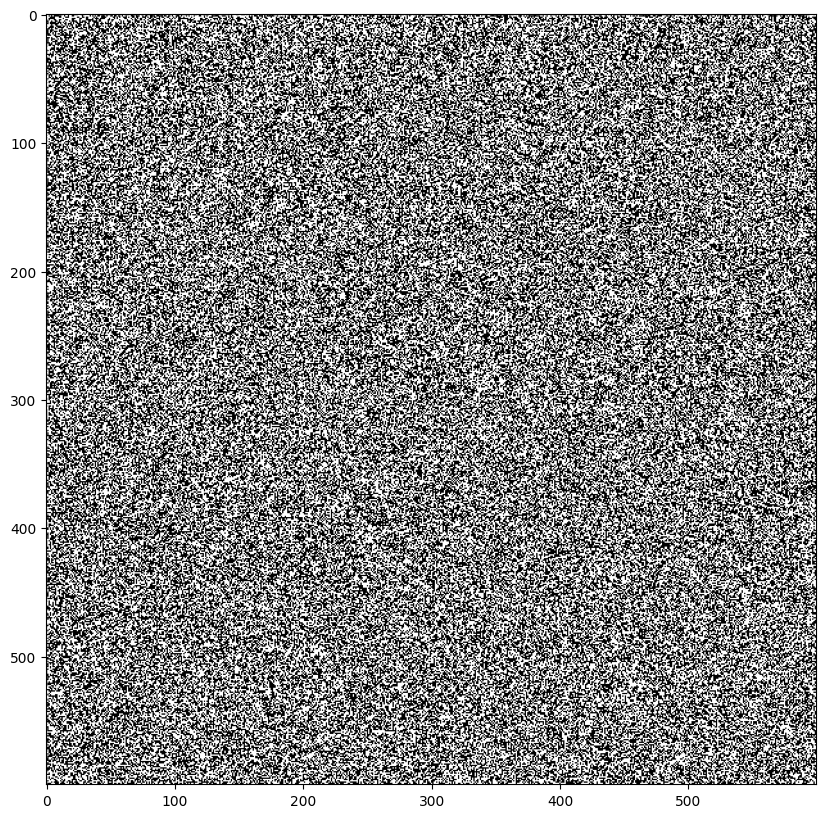

In [119]:
display_img(black_noise)

In [120]:
black_noise_img = img + black_noise

In [121]:
black_noise_img

array([[   0.,    0.,    0., ...,    0., -255.,    0.],
       [   0.,    0., -255., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ..., -255., -255., -255.],
       ...,
       [   0., -255.,    0., ..., -255.,    0.,    0.],
       [-255.,    0.,    0., ...,    0., -255.,    0.],
       [   0., -255., -255., ...,    0., -255.,    0.]])

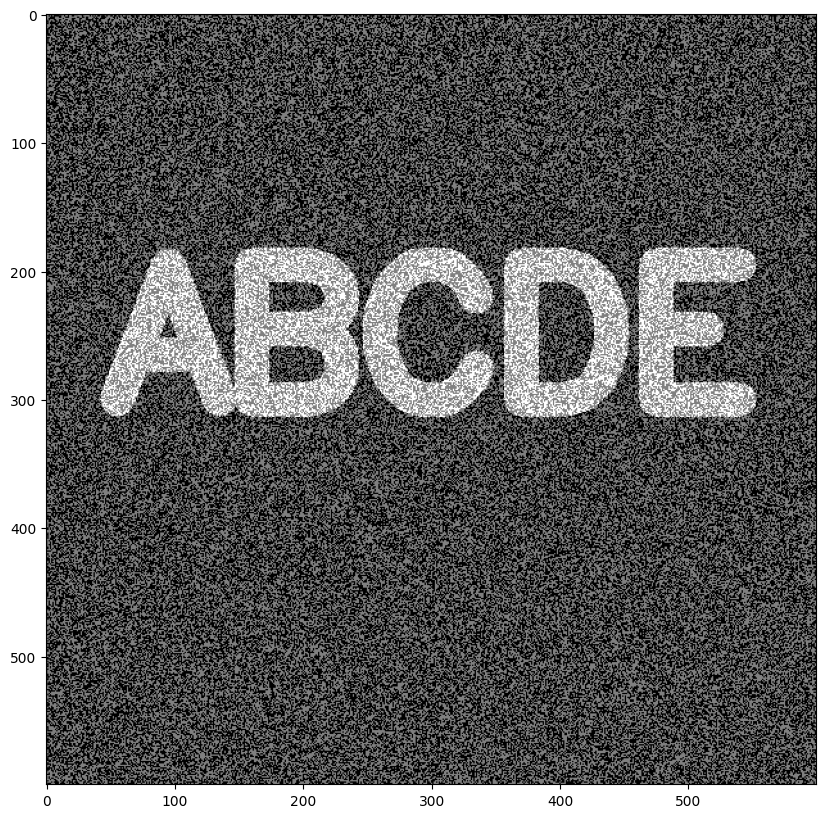

In [122]:
display_img(black_noise_img)

In [123]:
black_noise_img[black_noise_img == -255] = 0

In [124]:
black_noise_img.min()

0.0

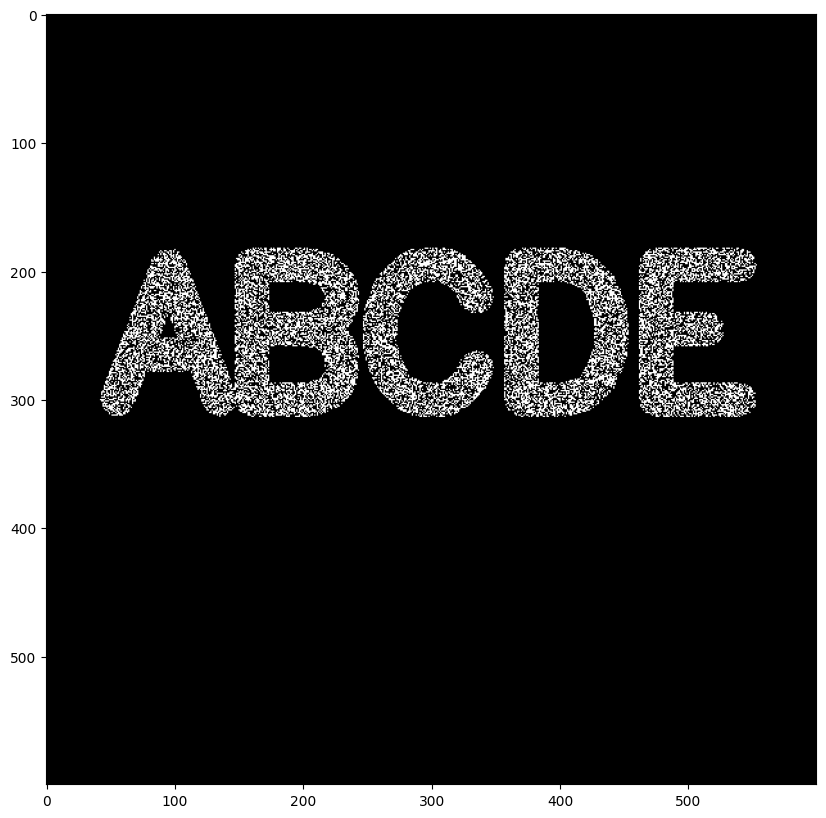

In [125]:
display_img(black_noise_img)

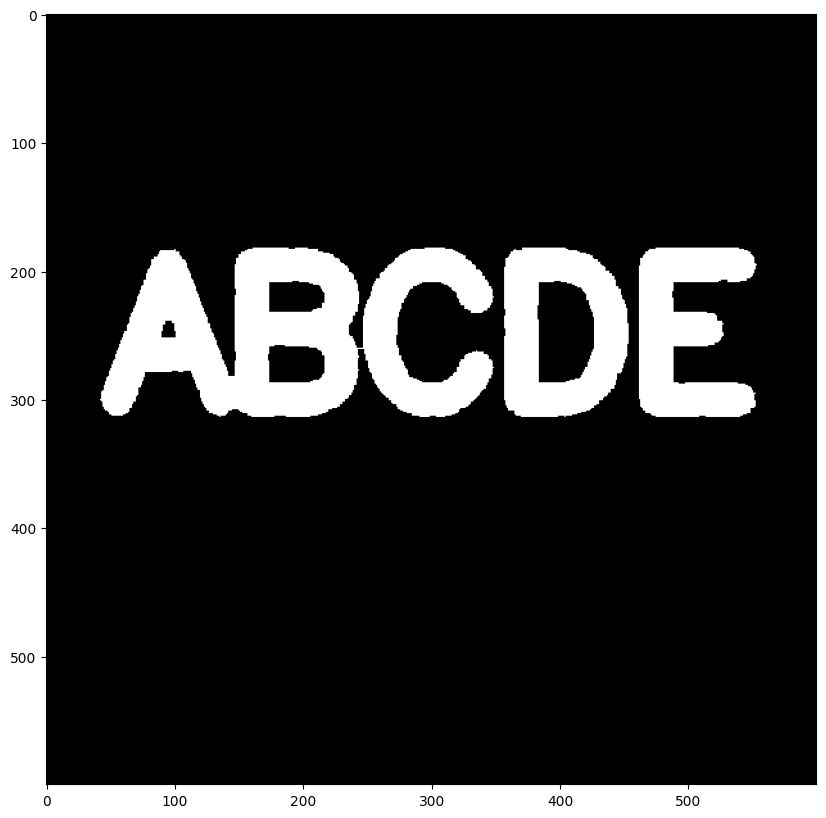

In [126]:
kernel = np.ones((5, 5), dtype=np.uint8)

closing = cv2.morphologyEx(black_noise_img,
                           op=cv2.MORPH_CLOSE,
                           kernel=kernel
                           )

display_img(closing)

## Simple Edge Detection

In [127]:
img = load_img()

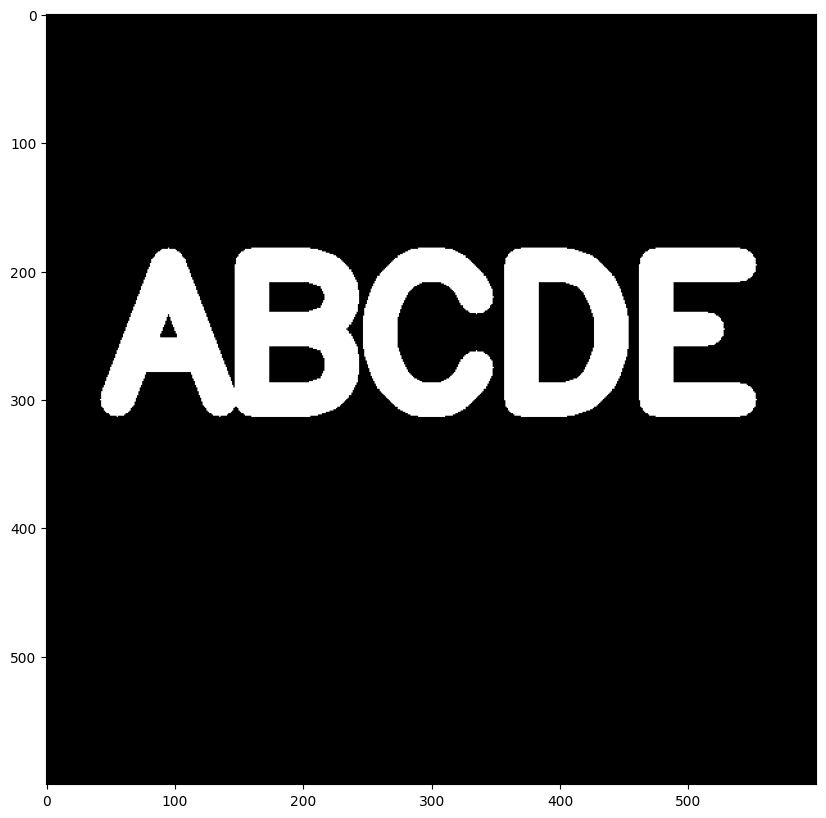

In [128]:
display_img(img)

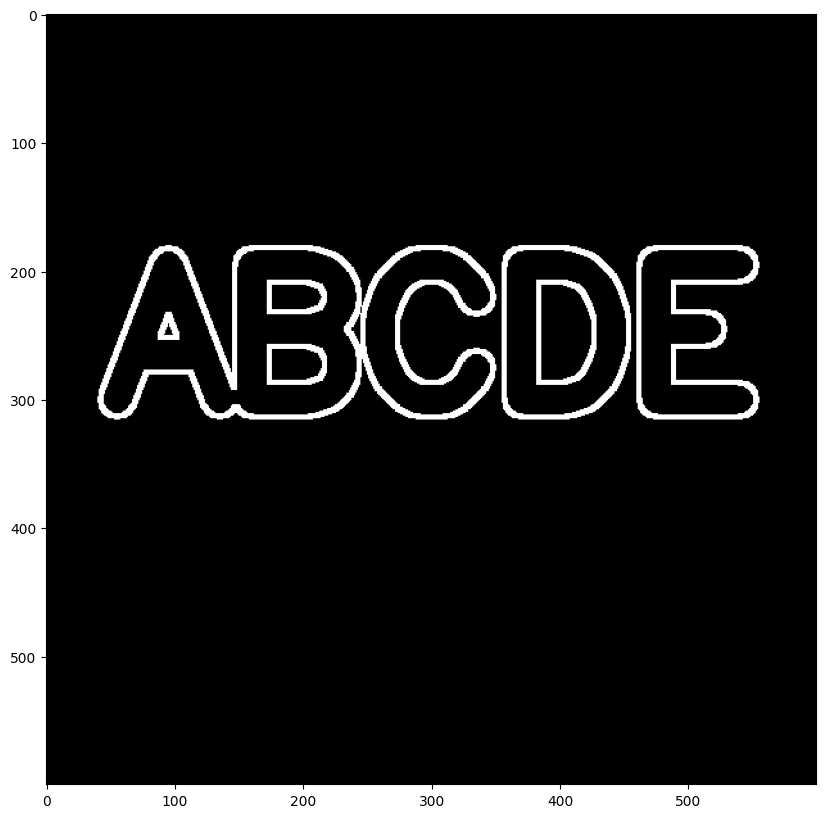

In [129]:
kernel = np.ones((5, 5), dtype=np.uint8)

gradient = cv2.morphologyEx(img,
                            op=cv2.MORPH_GRADIENT,
                            kernel=kernel
                            )

display_img(gradient)